# 머신러닝 상관분석

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

%config lnlineBackend.figure_format = 'retina'
!apt -qq -y install fonts-nanum


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,324 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

Text(0.5, 1.0, '한글')

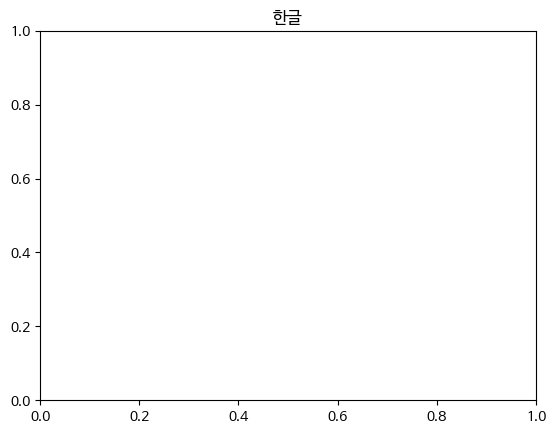

In [1]:
## 런타임 - 세션 다시시작

## 런타임 다시 시작 후 진행
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 확인
plt.title('한글')

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel('/content/drive/MyDrive/데이터마이닝/DATA/건강검진정보_학습데이터.xlsx')
df

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,높은혈압,높은혈당,높은중성지방,낮은콜레스테롤,복부비만,BMI,대사증후군수,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,0,0,0,0,0,24.22,0,정상,정상
1,여,135,40,81.0,118,63,112,168,42,0,1,1,1,0,21.95,3,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,1,0,0,0,0,23.78,1,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,0,1,0,0,0,28.89,1,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,0,0,1,1,0,22.89,2,주의군,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,여,150,50,69.0,100,64,93,307,37,0,0,1,1,0,22.22,2,주의군,정상
440,여,155,50,78.0,124,70,120,85,62,0,1,0,0,0,20.81,1,주의군,정상
441,여,155,55,77.0,100,71,88,56,71,0,0,0,0,0,22.89,0,정상,정상
442,남,160,60,80.2,150,90,104,88,71,1,1,0,0,0,23.44,2,주의군,정상


In [6]:
df.columns

Index(['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤',
       '높은혈압', '높은혈당', '높은중성지방', '낮은콜레스테롤', '복부비만', 'BMI', '대사증후군수', '대사증후군판별',
       '비만도판별'],
      dtype='object')

In [7]:
# 필요한 열 추출

df = df[['성별', '신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤','BMI', '대사증후군판별',
       '비만도판별']]
df.head()

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,24.22,정상,정상
1,여,135,40,81.0,118,63,112,168,42,21.95,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,23.78,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,28.89,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,22.89,주의군,정상


In [10]:
# 상관관계 구하기
# 범주형 데이터 제외
dfc = df[['신장', '체중', '허리둘레', '수축기혈압', '이완기혈압', '식전혈당', '트리글리세라이드', '콜레스테롤','BMI']]
dfc

,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI
0,170,70,82.0,124,80,83,95,57,24.22
1,135,40,81.0,118,63,112,168,42,21.95
2,145,50,78.0,148,67,98,70,57,23.78
3,150,65,83.0,118,68,111,106,66,28.89
4,155,55,74.0,110,77,98,193,35,22.89
...,...,...,...,...,...,...,...,...,...
439,150,50,69.0,100,64,93,307,37,22.22
440,155,50,78.0,124,70,120,85,62,20.81
441,155,55,77.0,100,71,88,56,71,22.89
442,160,60,80.2,150,90,104,88,71,23.44


In [11]:
dfc.corr()

# 신장과 신장 1을 기준으로 상관관계 분석됨 (같은 요소끼리는 상관관계 1임)
# 0.2 기준
# 0.4 이상이어야 활용가치가 있음
# BMI와 체중 - 0.8 많은 상관이 있음

,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI
신장,1.000000,0.645006,0.302799,-0.055145,0.135573,0.051325,0.118642,-0.145142,0.067374
체중,0.645006,1.000000,0.753935,0.118259,0.275549,0.185240,0.216597,-0.327300,0.800080
허리둘레,0.302799,0.753935,1.000000,0.195555,0.182503,0.306454,0.228146,-0.372141,0.758291
수축기혈압,-0.055145,0.118259,0.195555,1.000000,0.616629,0.162590,0.129026,-0.077924,0.195997
이완기혈압,0.135573,0.275549,0.182503,0.616629,1.000000,0.127697,0.185308,-0.077579,0.253130
식전혈당,0.051325,0.185240,0.306454,0.162590,0.127697,1.000000,0.179578,-0.140600,0.197018
트리글리세라이드,0.118642,0.216597,0.228146,0.129026,0.185308,0.179578,1.000000,-0.361940,0.191453
콜레스테롤,-0.145142,-0.327300,-0.372141,-0.077924,-0.077579,-0.140600,-0.361940,1.000000,-0.318655
BMI,0.067374,0.800080,0.758291,0.195997,0.253130,0.197018,0.191453,-0.318655,1.000000


In [13]:
# 상관관계 그래프
import seaborn as sns

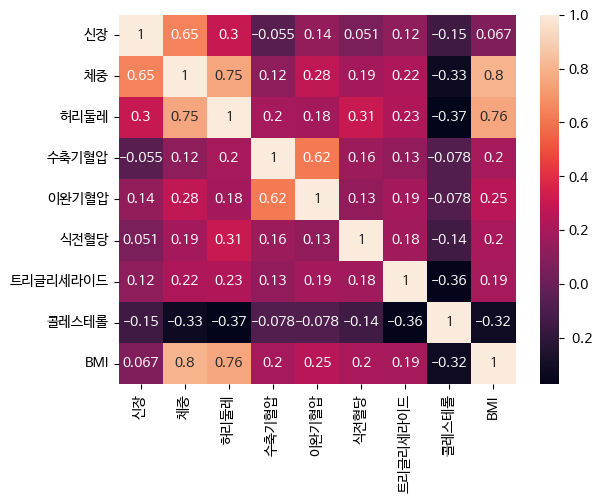

In [18]:
sns.heatmap(dfc.corr(),annot=True)
plt.show()

BMI와 가장 상관관계가 높은 것 : 체중과 허리둘레 (최소 0.4이상, 0.6~0.8 높은 상관관계)

---

-> BMI 예측값 피처값으로 체중과 허리둘레로 쓰겠다

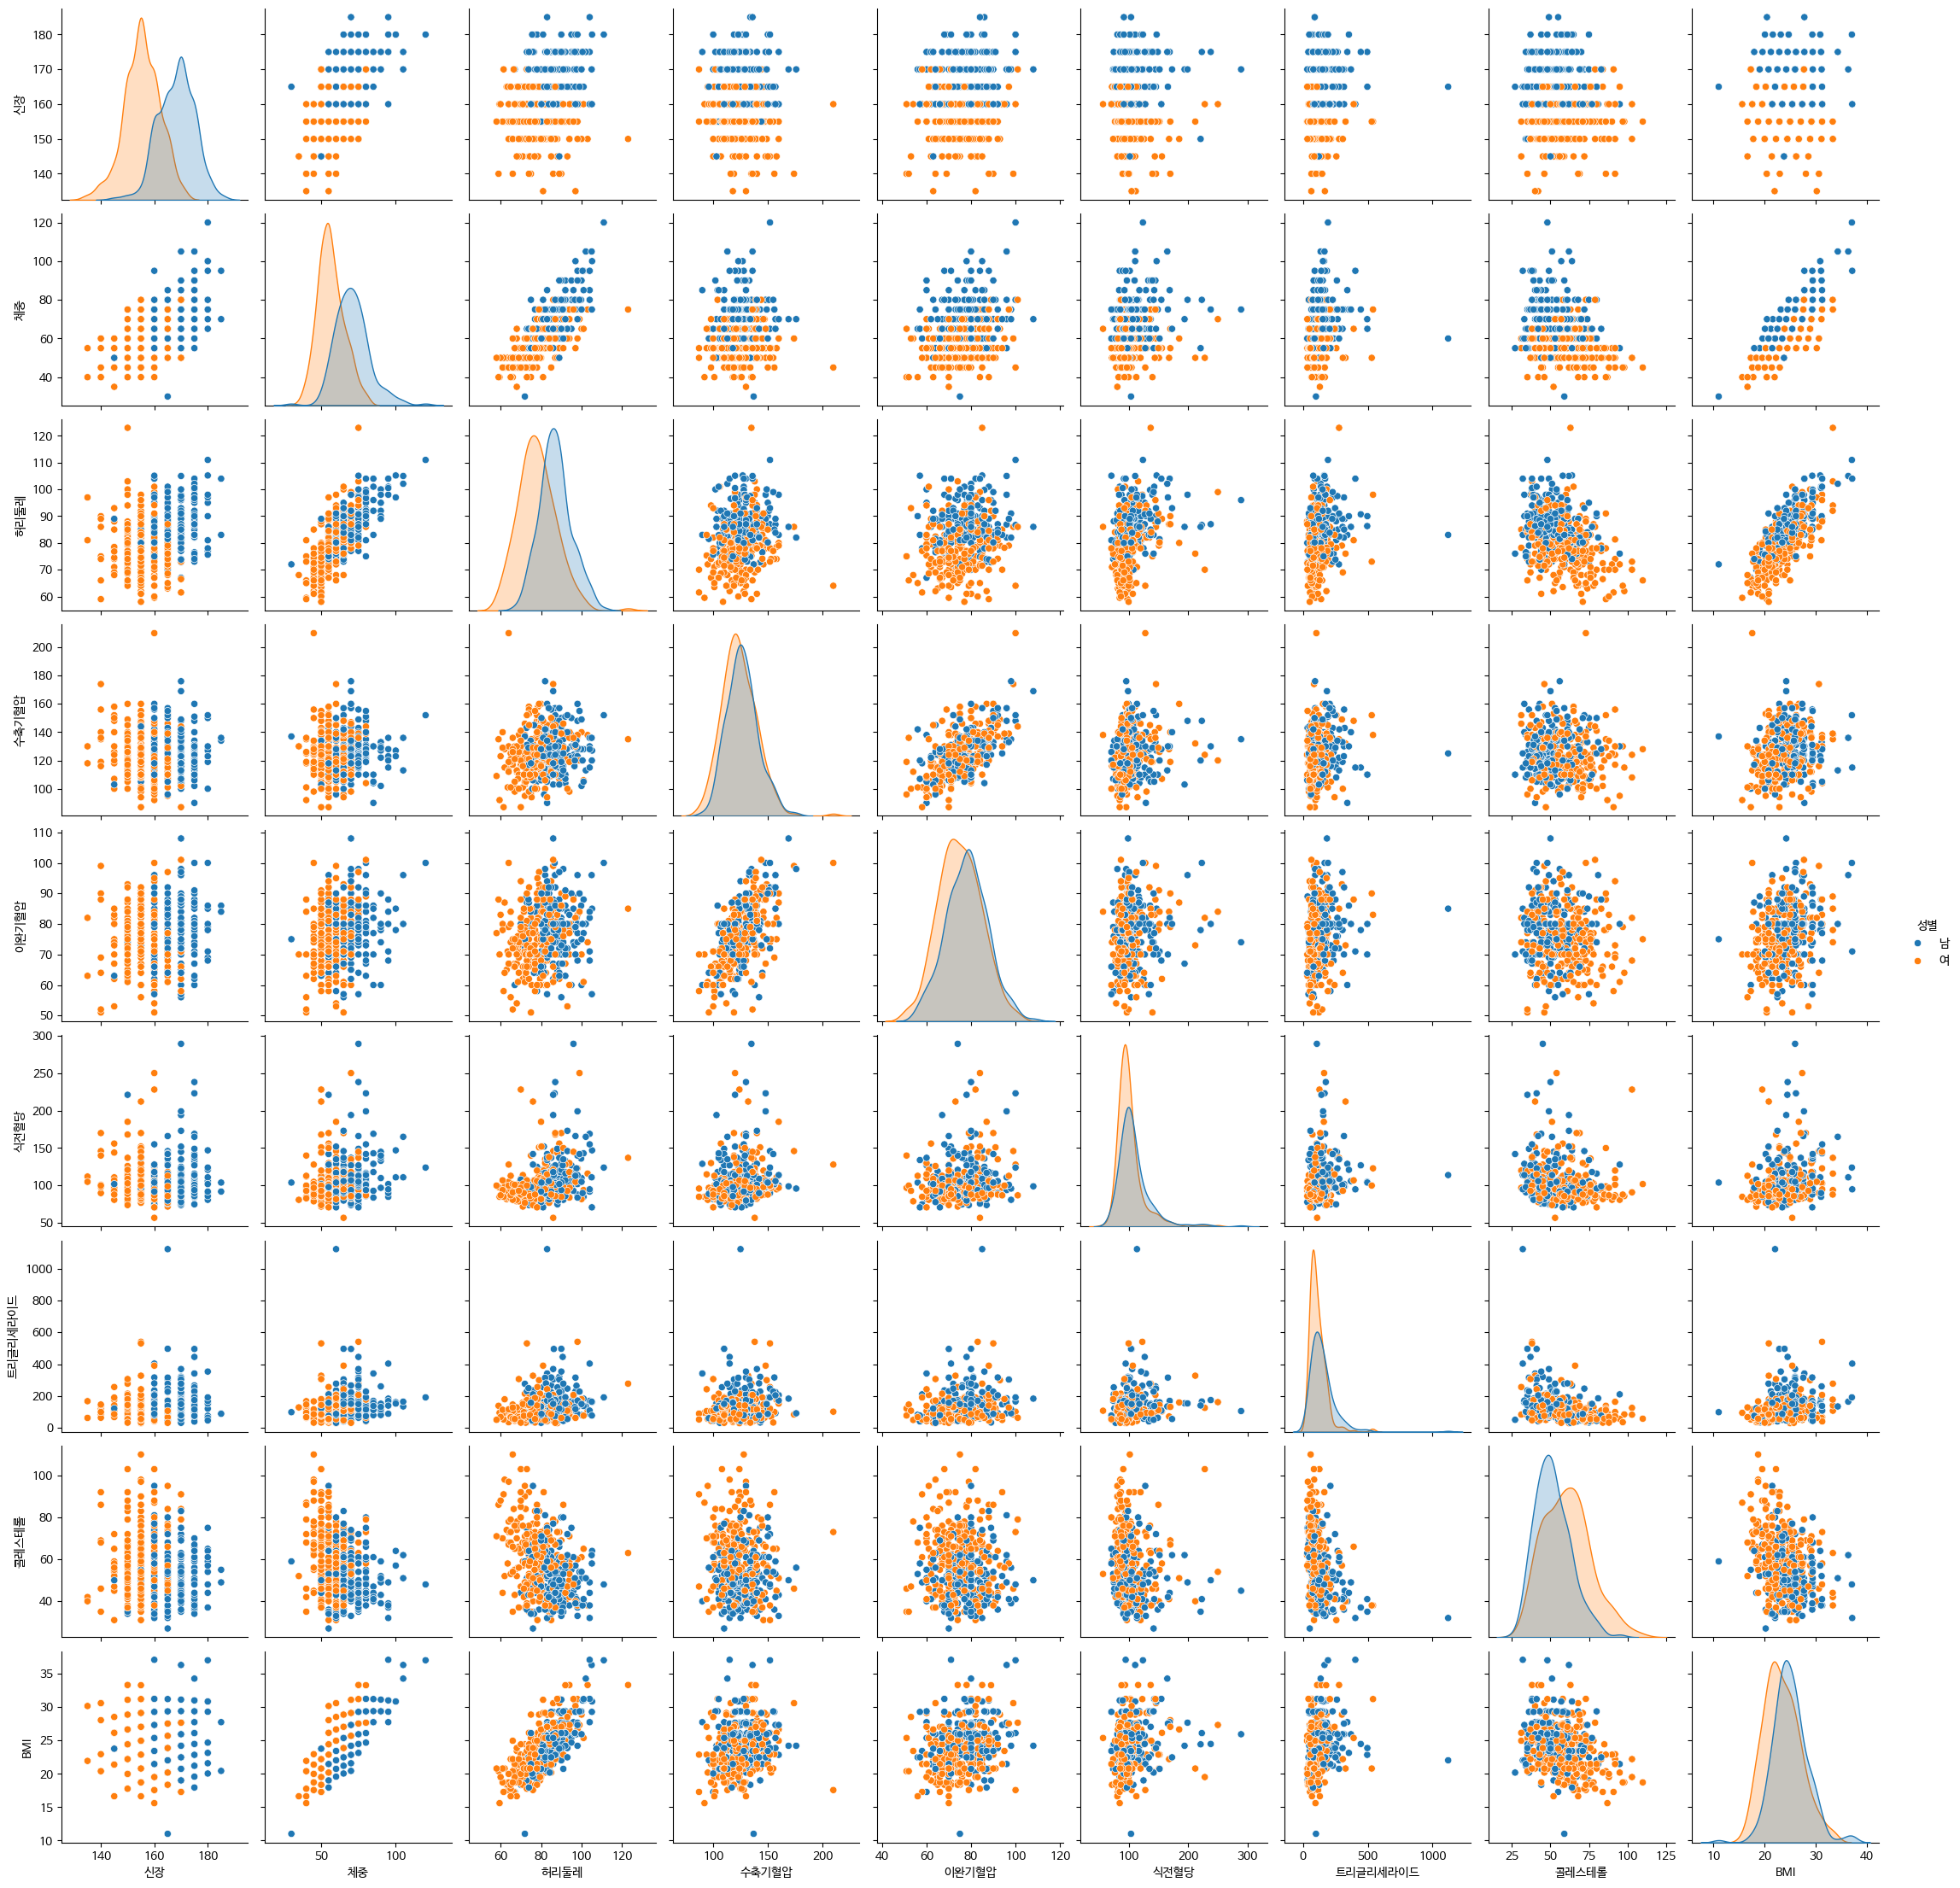

In [19]:
#BMI와 산점도
sns.pairplot(df,hue='성별')
plt.show()

회귀식의 적합도 = R의 제곱 (모형의 적합도)

---

pairplot을 통해 상관관계가 있는지 없는지를 파악할 수 있어야 함

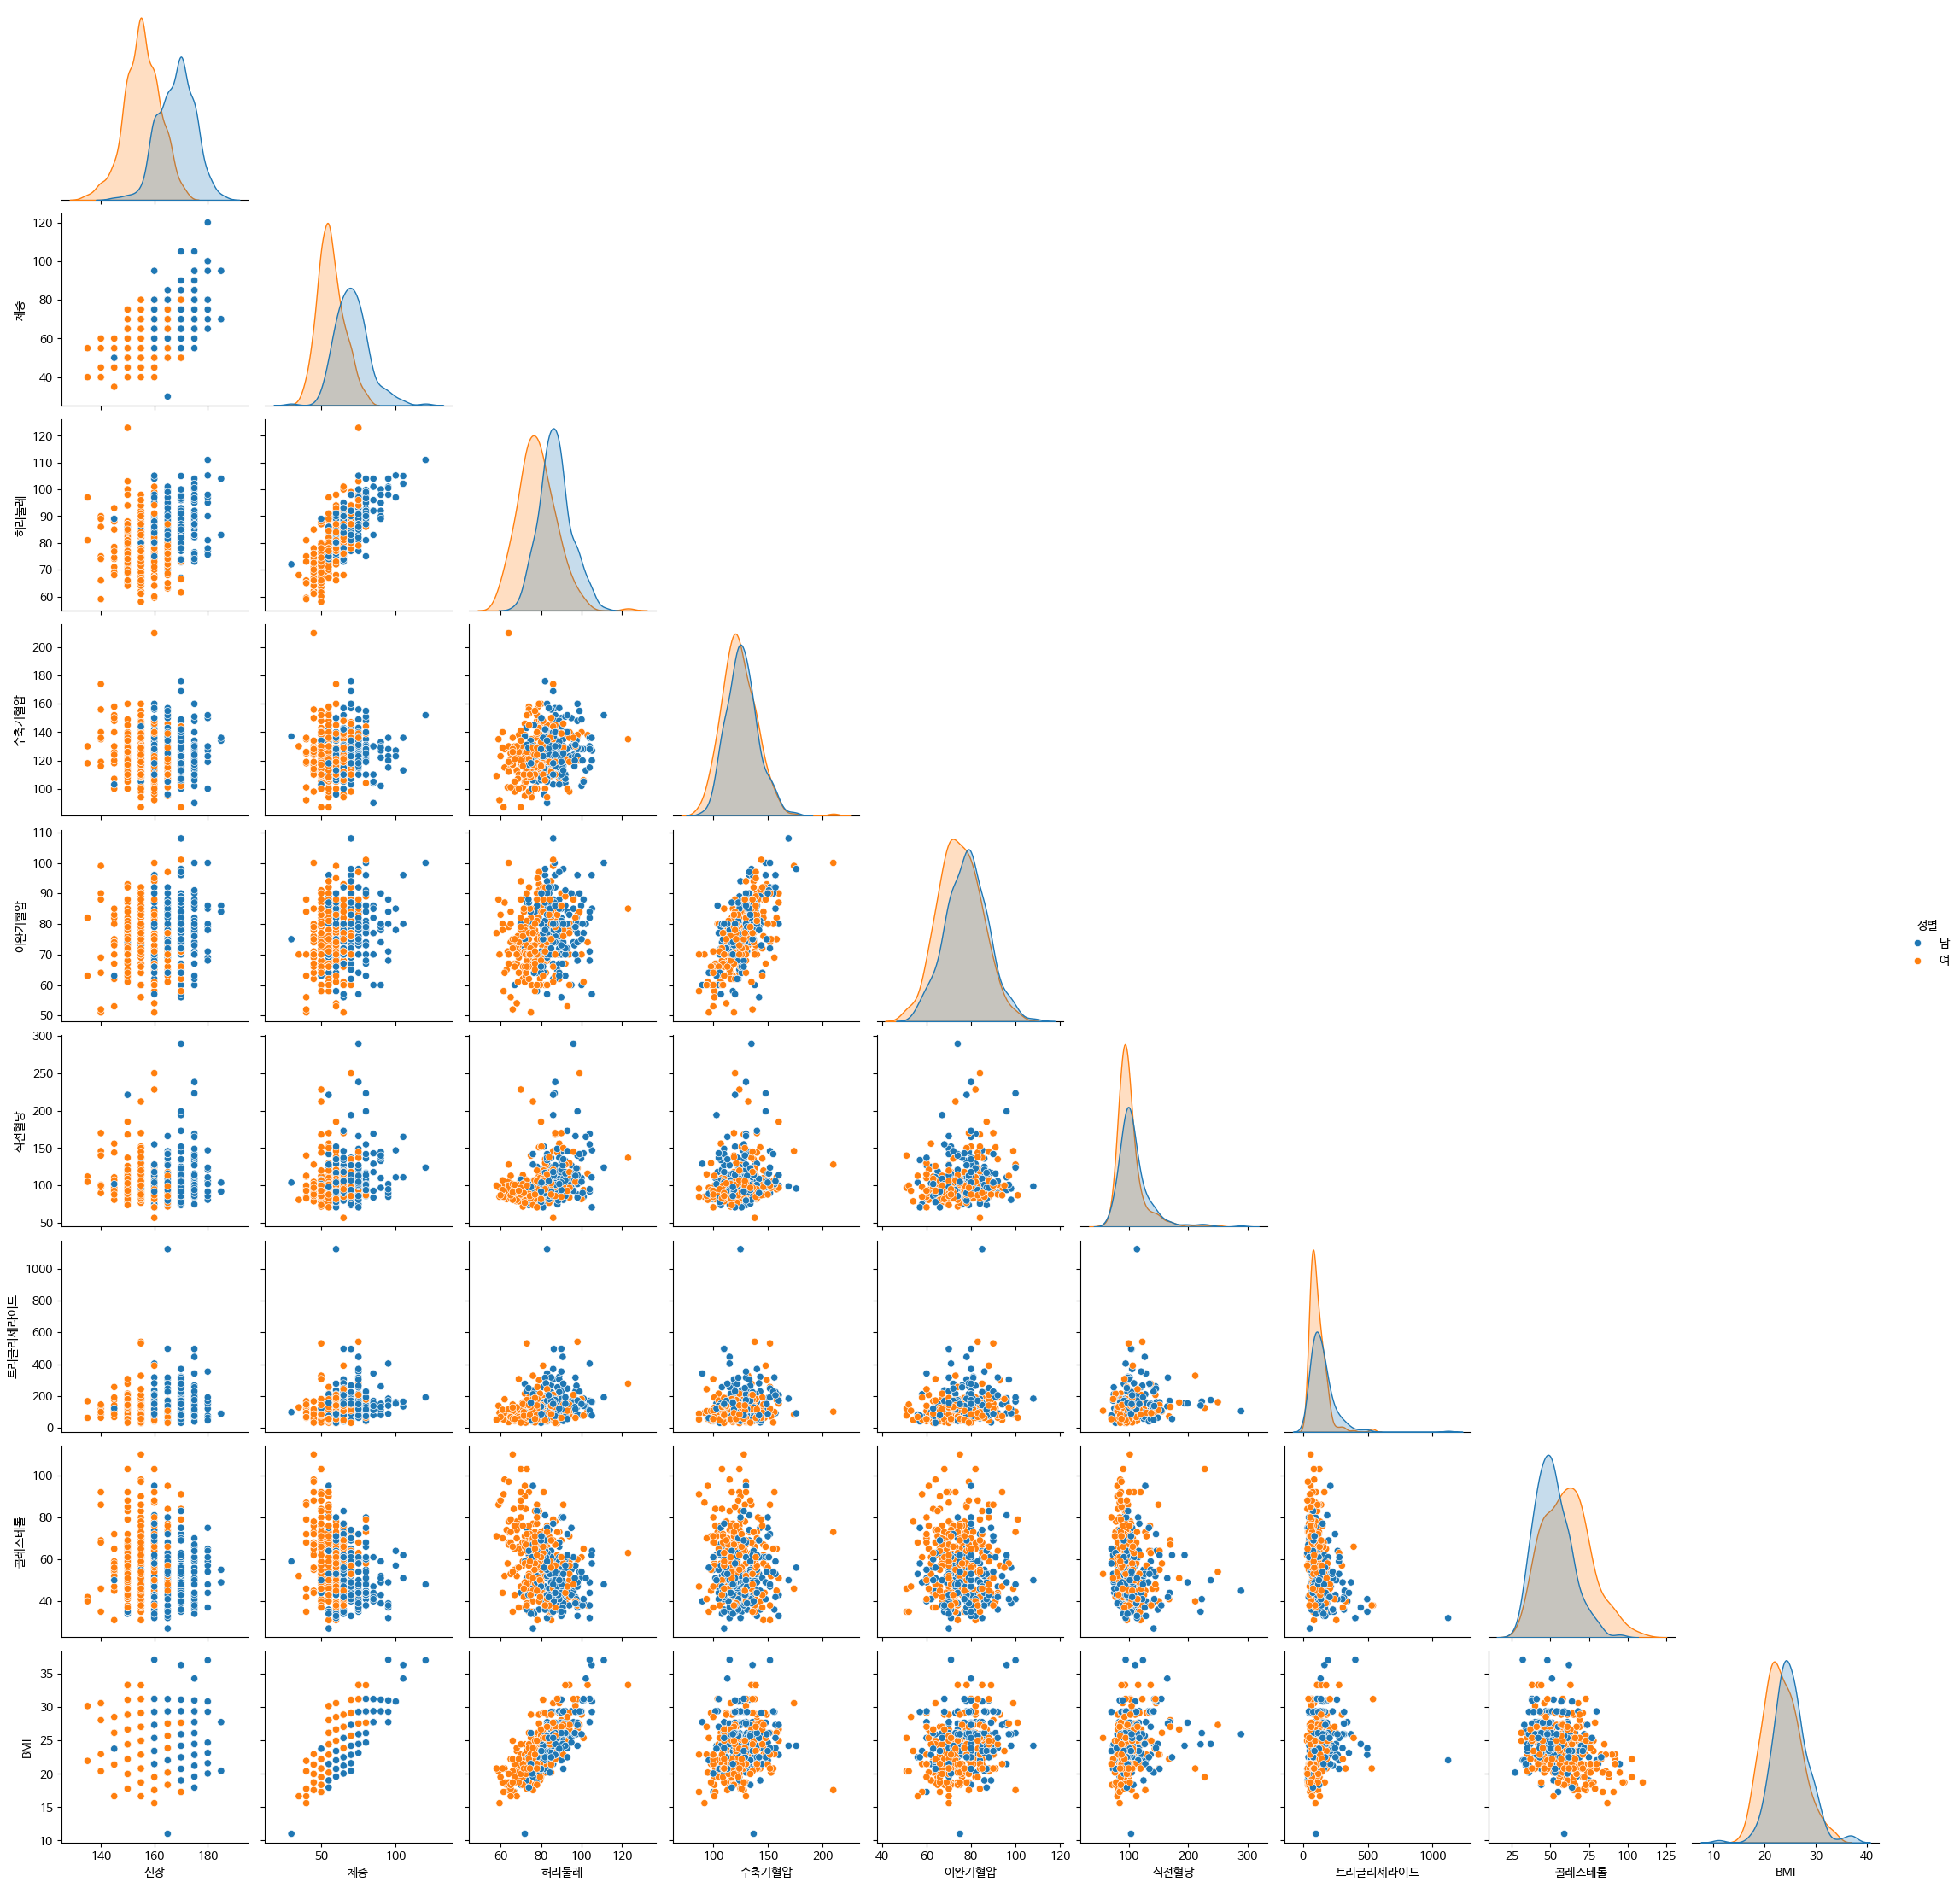

In [20]:
#BMI와 산점도 (corner 중복 제거)
sns.pairplot(df,hue='성별',corner=True)
plt.show()

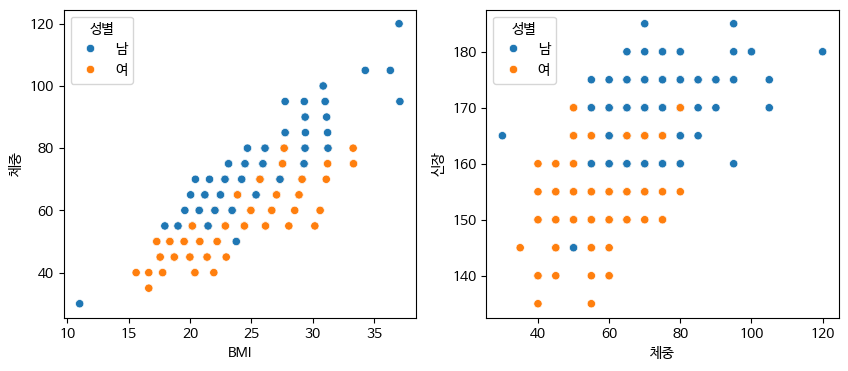

In [21]:
# BMI - 체중 / 체중 - 신장
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(10, 4))
sns.scatterplot(x='BMI', y='체중', hue='성별', data=df, ax=ax[0])
sns.scatterplot(x='체중', y='신장', hue='성별', data=df, ax=ax[1])
plt.show()

# 머신러닝 : 지도학습

In [22]:
# 데이터 확인
df.head()

,성별,신장,체중,허리둘레,수축기혈압,이완기혈압,식전혈당,트리글리세라이드,콜레스테롤,BMI,대사증후군판별,비만도판별
0,남,170,70,82.0,124,80,83,95,57,24.22,정상,정상
1,여,135,40,81.0,118,63,112,168,42,21.95,위험군,정상
2,여,145,50,78.0,148,67,98,70,57,23.78,주의군,정상
3,여,150,65,83.0,118,68,111,106,66,28.89,주의군,과체중
4,여,155,55,74.0,110,77,98,193,35,22.89,주의군,정상


In [23]:
# 테스트셋과 트레이닝셋을 나누기 : targer은 BMI
# 디폴트 값은 0.25 (test 데이터 값에 따라 자동으로 train 값이 정해짐)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.loc[ :,['신장','체중']],df['BMI'],test_size=0.2,random_state=7)


 feature set (신장,체중) targer set(BMI)  코드를 여러번 실행해도, 결과의 일관성 유지를 위한 state 7로써

In [24]:
# 학습데이터 : 444*80%
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 32 to 175
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   신장      355 non-null    int64
 1   체중      355 non-null    int64
dtypes: int64(2)
memory usage: 8.3 KB


test값 : 0.2로 할당 -> train 값 : 0.8

In [25]:
# 테스트데이터 : 444*20%
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 353 to 228
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   신장      89 non-null     int64
 1   체중      89 non-null     int64
dtypes: int64(2)
memory usage: 2.1 KB


In [26]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 355 entries, 32 to 175
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
355 non-null    float64
dtypes: float64(1)
memory usage: 5.5 KB


Series name: BMI

X테스트 89개 값으로 학습데이터에서 생성된 모델에 적용하여, y 테스트값을 예측하게됨

---
정답 89개를 이미 알고있는 상황에서 예측값과의 차이를 분석하게 됨


In [27]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 89 entries, 353 to 228
Series name: BMI
Non-Null Count  Dtype  
--------------  -----  
89 non-null     float64
dtypes: float64(1)
memory usage: 1.4 KB


# 다중 회귀분석 (모델 추가)

In [29]:
# 모델
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# 평가지표
from sklearn.metrics import mean_squared_error, r2_score

단순히 RandomForestRegressor 를 했을 때 오버피팅의 문제 -> GradientBoostingRegressor

In [31]:
# 항상 이 순서로 진행해야 함

# 모델 생성하기 (빈 객체 생성)

lr = LinearRegression()


# 학습하기 (fit 함수, train 데이터)

lr.fit(X_train,y_train)


# 예측하기 (predict 함수)

pred =  lr.predict(X_test)


# 평가하기 (score 함수)

train_score = lr.score(X_train,y_train)
test_score = lr.score(X_test,y_test)


print(f'train : {train_score}')
print(f'test : {test_score}')

train : 0.9845550661385976
test : 0.9857368311634153


train : 0.9845550661385976

test : 0.9857368311634153

In [32]:
# 상수항
print(lr.intercept_)

# 가중치 : 신장, 체중
print(lr.coef_)

48.81681338205388
[-0.2994206   0.37404877]


In [35]:
# 상수, 계수값 계산
print(f'{lr.intercept_}')
for i, v in enumerate(lr.coef_):
  print(f' + {v} * X{i}')

48.81681338205388
 + -0.2994205954294438 * X0
 + 0.37404877161240535 * X1


**회귀분석 식**

---

48.81681338205388 - 0.2994205954294438 * X0 + 0.37404877161240535 * X1

---

X0 는 신장, X1 는 체중

In [36]:
# 평가지표
from sklearn.metrics import r2_score

# y_test와 pred의 차이
def eval(y_test, pred) :
  # 평가하기
  MSE = mean_squared_error(y_test, pred)
  RMSE = mean_squared_error(y_test, pred, squared=False)
  R2 = r2_score(y_test, pred)

  print(f'MSE : {MSE}, RMSE : {RMSE}, R2 : {R2}')
  return (MSE, RMSE, R2)

In [37]:
eval(y_test, pred)

MSE : 0.16729335480803892, RMSE : 0.4090151033984429, R2 : 0.9857368311634153


(0.16729335480803892, 0.4090151033984429, 0.9857368311634153)

E(오류값) -> 낮을수록 좋음 / R2 -> 1에 가까울수록 좋음 ( 전체 모형의 적합도가 높다라는 것을 의미함 )

In [42]:
# 여러가지 모델 동시 수행
model_dic = {
    "LinearRegression" : LinearRegression(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "Random Forest" : RandomForestRegressor(max_depth=5, n_estimators=10,max_features=1),
    "SVR" : SVR()
}

model_predict = {}
model_evaluation = {}

for key in model_dic.keys() :
  model = model_dic[key]
  print(f'{key} : training')
  model.fit(X_train, y_train)

  print(f'{key} : predict')
  model_predict[key] = model.predict(X_test)
  model_evaluation[key] = eval(y_test,model_predict[key])

LinearRegression : training
LinearRegression : predict
MSE : 0.16729335480803892, RMSE : 0.4090151033984429, R2 : 0.9857368311634153
GradientBoostingRegressor : training
GradientBoostingRegressor : predict
MSE : 0.09695295078314287, RMSE : 0.31137268792099104, R2 : 0.9917339435997812
Random Forest : training
Random Forest : predict
MSE : 1.5602053480410745, RMSE : 1.2490818019813892, R2 : 0.8669793410241121
SVR : training
SVR : predict
MSE : 0.24872683581055355, RMSE : 0.4987252107228524, R2 : 0.9787939403963405


R2 : 0.9917339435997812 (gridient가 가장 높게 나옴)

In [43]:
model_evaluation

{'LinearRegression': (0.16729335480803892,
  0.4090151033984429,
  0.9857368311634153),
 'GradientBoostingRegressor': (0.09695295078314287,
  0.31137268792099104,
  0.9917339435997812),
 'Random Forest': (1.5602053480410745, 1.2490818019813892, 0.8669793410241121),
 'SVR': (0.24872683581055355, 0.4987252107228524, 0.9787939403963405)}

In [44]:
eval_df = pd.DataFrame(model_evaluation)
eval_df = eval_df.T #열과 행 전환
eval_df.columns = ['MSE','RMSE','R2']
eval_df

,MSE,RMSE,R2
LinearRegression,0.167293,0.409015,0.985737
GradientBoostingRegressor,0.096953,0.311373,0.991734
Random Forest,1.560205,1.249082,0.866979
SVR,0.248727,0.498725,0.978794


QUIZ : 상위 결과값을 해석하라

Gradient 값이 0.99로 가장 크다

'MSE','RMSE','R2' 가 뭐고, 각각의 값이 뭔지 해석할 수 있어야 함